In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d salader/dogs-vs-cats

 97% 1.04G/1.06G [00:10<00:00, 66.7MB/s]
100% 1.06G/1.06G [00:10<00:00, 111MB/s] 


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()


In [71]:
import tensorflow as tf
import random
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D,Flatten,BatchNormalization,Dropout

In [39]:
# generator
train_ds =keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels="inferred",
    label_mode="int",
    class_names=None,
    batch_size=32,
    image_size=(256, 256),

)

validation_ds =keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels="inferred",
    label_mode="int",
    class_names=None,

    batch_size=32,
    image_size=(256, 256),

)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [40]:
#Normalize

def process(image, label):
    image = tf.cast(image/255. ,tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

***Create CNN Model***

coustomize aretecture

In [43]:
model = Sequential()

#input layer
model.add(Conv2D(32, kernel_size =(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#hideen layer
model.add(Conv2D(64, kernel_size =(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size =(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#single array
model.add(Flatten())

#output layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [44]:
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [46]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [47]:
history = model.fit(train_ds, epochs=10, validation_data= validation_ds)

Epoch 1/10
625/625 [==============================] - 69s 104ms/step - loss: 1.7097 - accuracy: 0.5657 - val_loss: 0.6548 - val_accuracy: 0.6264
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.6391 - accuracy: 0.6517 - val_loss: 0.6304 - val_accuracy: 0.6168
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5649 - accuracy: 0.7161 - val_loss: 0.5256 - val_accuracy: 0.7448
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5197 - accuracy: 0.7448 - val_loss: 0.5236 - val_accuracy: 0.7440
Epoch 5/10
625/625 [==============================] - 64s 101ms/step - loss: 0.4462 - accuracy: 0.7901 - val_loss: 0.4867 - val_accuracy: 0.7580
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4111 - accuracy: 0.8093 - val_loss: 0.4722 - val_accuracy: 0.7794
Epoch 7/10
625/625 [==============================] - 63s 101ms/step - loss: 0.3588 - accuracy: 0.8370 - val_loss: 0.5194 - val_ac

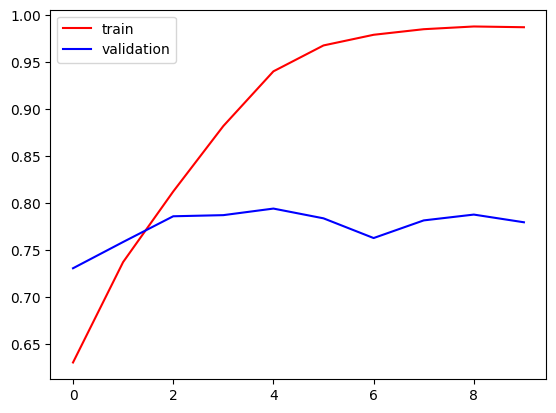

In [36]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color ='red',label='train')
plt.plot(history.history['val_accuracy'], color ='blue',label='validation')
plt.legend()
plt.show()


In [48]:
plt.plot(history.history['loss'], color ='red',label='train')
plt.plot(history.history['val_loss'], color ='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# OverFiting

#add more data
# data augmentation
# L1/L2 regular
#DropOut
#batch Normlize
#Reduce Complexity

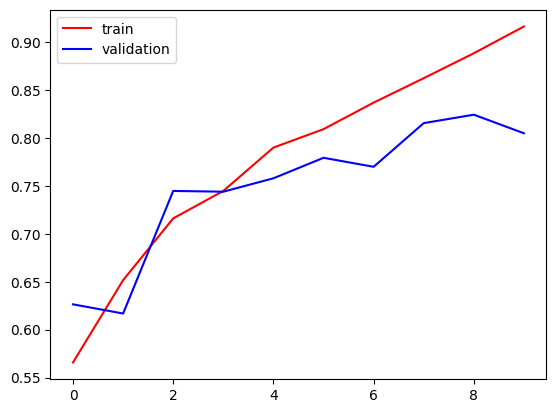

In [49]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color ='red',label='train')
plt.plot(history.history['val_accuracy'], color ='blue',label='validation')
plt.legend()
plt.show()

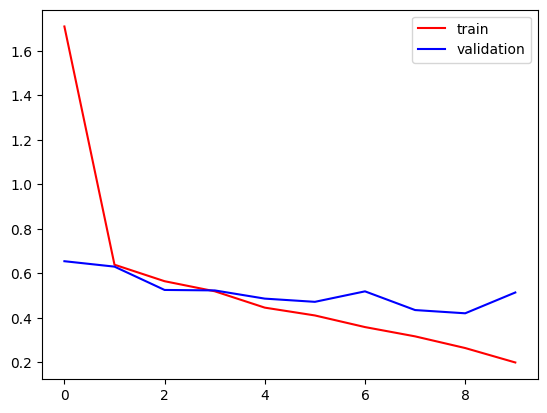

In [50]:

plt.plot(history.history['loss'], color ='red',label='train')
plt.plot(history.history['val_loss'], color ='blue',label='validation')
plt.legend()
plt.show()

In [51]:
import cv2

In [52]:
test_img =cv2.imread('/content/dog.jpeg')

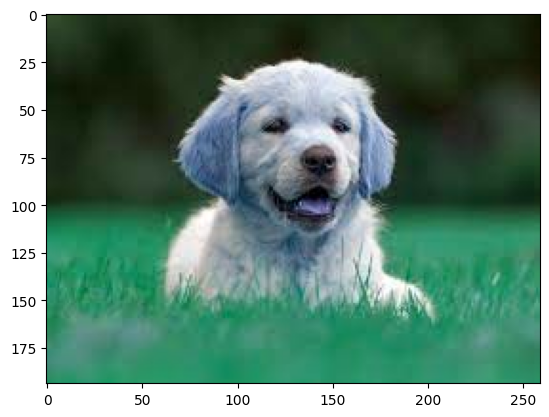

In [53]:
plt.imshow(test_img)

In [55]:
test_img.shape

(194, 259, 3)

In [57]:
test_img = cv2.resize(test_img,(256,256))

In [58]:
test_img.shape

(256, 256, 3)

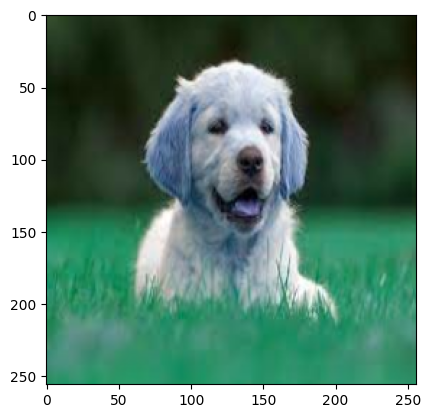

In [59]:
plt.imshow(test_img)

In [60]:
test_input = test_img.reshape((1,256,256,3))

In [61]:
model.predict(test_input)

1/1 [==============================] - 1s 720ms/step


array([[1.]], dtype=float32)

In [62]:
test_img =cv2.imread('/content/cat.jpeg')

In [63]:
test_img.shape

(225, 225, 3)

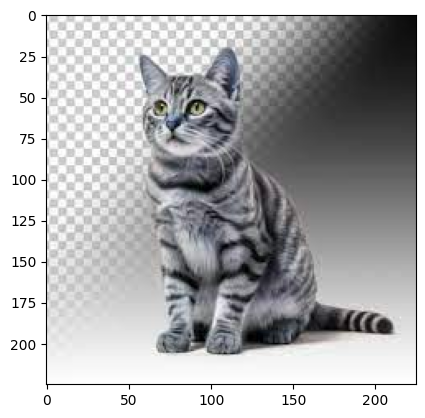

In [64]:
plt.imshow(test_img)

In [65]:
test_img = cv2.resize(test_img,(256,256))

In [68]:
test_input = test_img.reshape((1,256,256,3))

In [76]:
model.predict(test_input)


1/1 [==============================] - 0s 18ms/step


array([[0.10205333]], dtype=float32)